In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
quotations = pd.read_csv("../quotations231001.csv").drop(columns='sys_cooler')
print('len:', len(quotations))
quotations.head()

len: 1080


,cpu,mainboard,ram,gpu,case,power,cooler,ssd
0,18640280.0,18652877.0,16443341.0,27613427.0,21583046.0,19813847.0,21550985.0,12338942.0
1,18039569.0,18652877.0,18700841.0,18021914.0,18419840.0,19023932.0,NaN,13538642.0
2,19627808.0,18021440.0,18911780.0,18668606.0,12969350.0,21206702.0,18714860.0,17454683.0
3,19174175.0,21628184.0,18911780.0,21629063.0,NaN,19814027.0,NaN,17001050.0
4,17913710.0,18021491.0,18911780.0,18303401.0,16571885.0,18442058.0,18076145.0,16587443.0


In [3]:
cpus = quotations.cpu

In [49]:
cpu_df = pd.read_csv("../part_cpu_wb230922.csv")
mainboard_df = pd.read_csv("../part_mainboard230926.csv")
ram_df = pd.read_csv("../part_ram230921.csv")
gpu_df = pd.read_csv("../part_gpu_wb230921.csv")
case_df = pd.read_csv("../part_case230920.csv")
power_df = pd.read_csv("../part_power230920.csv")
cooler_df = pd.read_csv("../part_cooler230920.csv")
ssd_df = pd.read_csv("../part_ssd230926.csv")

In [347]:
mcb = max(cpu_df['bench_mark'])
mgb = max(gpu_df['bench_mark'])
mrc = max(ram_df['capacity'])
mncb = min(cpu_df['bench_mark'])
mngb = min(gpu_df['bench_mark'])
mnrc = min(ram_df['capacity'])

In [412]:
prices_r = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
prices = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
pseqs = dict({'cpu': [], 'gpu': [], 'ram': []})
# bench_r = dict({'cpu': [], 'gpu': [], 'ram': []})
bench_r = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
bench_rr = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})

for row in quotations.values:
    try:
        cpu_price = cpu_df.loc[cpu_df['product_seq'] == row[0], 'price'].iloc[0]
        ram_price = ram_df.loc[ram_df['product_seq'] == row[2], 'price'].iloc[0]
        gpu_price = gpu_df.loc[gpu_df['product_seq'] == row[3], 'price'].iloc[0]
        
        cpu_bench = cpu_df.loc[cpu_df['product_seq'] == row[0], 'bench_mark'].iloc[0]
        ram_capa = ram_df.loc[ram_df['product_seq'] == row[2], 'capacity'].iloc[0]
        gpu_bench = gpu_df.loc[gpu_df['product_seq'] == row[3], 'bench_mark'].iloc[0]

        others = []
        others.append(mainboard_df.loc[mainboard_df['product_seq'] == row[1], 'price'])
        others.append(case_df.loc[case_df['product_seq'] == row[4], 'price'])
        others.append(power_df.loc[power_df['product_seq'] == row[5], 'price'])
        others.append(cooler_df.loc[cooler_df['product_seq'] == row[6], 'price'])
        others.append(ssd_df.loc[ssd_df['product_seq'] == row[7], 'price'])
        
        total = cpu_price+gpu_price+ram_price
        for o in others:
            if not o.empty: total += o.iloc[0]
        if np.isnan(total) or np.isnan(gpu_price) or np.isnan(ram_price): continue
        prices_r['cpu'].append(cpu_price / total)
        prices_r['gpu'].append(gpu_price / total)
        prices_r['ram'].append(ram_price / total)
        prices_r['total'].append(np.log(total / 100000000))
        
        bench_r['cpu'].append(np.log((cpu_bench - mncb) / (mcb - mncg) + 1))
        bench_r['gpu'].append(np.log((gpu_bench - mngb) / (mgb - mngb) + 1))
        bench_r['ram'].append(np.log((ram_capa - mnrc) / (mrc - mnrc) + 1))
        bench_r['total'].append(np.log(total / 100000000))
        
        clog = np.log((cpu_bench - mncb) / (mcb - mncg) + 1)
        glog = np.log((gpu_bench - mngb) / (mgb - mngb) + 1)
        rlog = np.log((ram_capa - mnrc) / (mrc - mnrc) + 1)
        tlog = np.log(total / 100000000)
        total_log = clog + glog + rlog + tlog
        bench_rr['cpu'].append(clog / total_log)
        bench_rr['gpu'].append(glog / total_log)
        bench_rr['ram'].append(rlog / total_log)
        bench_rr['total'].append(tlog / total_log)
        
        prices['cpu'].append(cpu_price)
        prices['gpu'].append(gpu_price)
        prices['ram'].append(ram_price)
        prices['total'].append(total)
        
        pseqs['cpu'].append(cpu_df.loc[cpu_df['product_seq'] == row[0], 'product_seq'].iloc[0])
        pseqs['gpu'].append(gpu_df.loc[gpu_df['product_seq'] == row[2], 'product_seq'].iloc[0])
        pseqs['ram'].append(ram_df.loc[ram_df['product_seq'] == row[3], 'product_seq'].iloc[0])
        
    except Exception as e:
        continue

In [349]:
for key in prices_r.keys():
    print(len(prices_r[key]))
    print(len(prices[key]))
print(len(prices['total']))

680
680
680
680
680
680
680
680
680


In [350]:
minc = min(prices['cpu'])
maxc = max(prices['cpu'])
ming = min(prices['gpu'])
maxg = max(prices['gpu'])
minr = min(prices['ram'])
maxr = max(prices['ram'])
mint = min(prices['total'])
maxt = max(prices['total'])

In [351]:
cpn = [(x - minc) / (maxc - minc) for x in prices['cpu']]
gpn = [(x - ming) / (maxg - ming) for x in prices['gpu']]
rpn = [(x - minr) / (maxr - minr) for x in prices['ram']]
tpn = [(x - mint) / (maxt - mint) for x in prices['total']]

In [352]:
for t in prices['cpu']:
    if np.isnan(t):
        print(t)

In [353]:
pdata = np.array([cpn, gpn, rpn, tpn]).T

In [354]:
price_rate = np.array(pd.DataFrame(prices_r))

In [355]:
k = 10
model = KMeans(n_clusters=k, n_init='auto')

### CPU, GPU, RAM, 총 가격 수준이 비슷한 견적들끼리 묶는다.
- 군집화(Clustering)에 K-Means 알고리즘을 사용함

In [304]:
model.fit(pdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=10, n_init='auto')

In [305]:
res = model.predict(pdata)

# 1. 총 견적 가격(y축)에서 CPU가 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 CPU의 가격이 차지하는 비율은 낮아짐
- 그룹1 (파랑): 일반적인 용도 (사무 등)
- 그룹2 (노랑): 중간 사양
- 그룹3 (초록): 고사양
- 그룹4 (빨강): 고사양(게임)

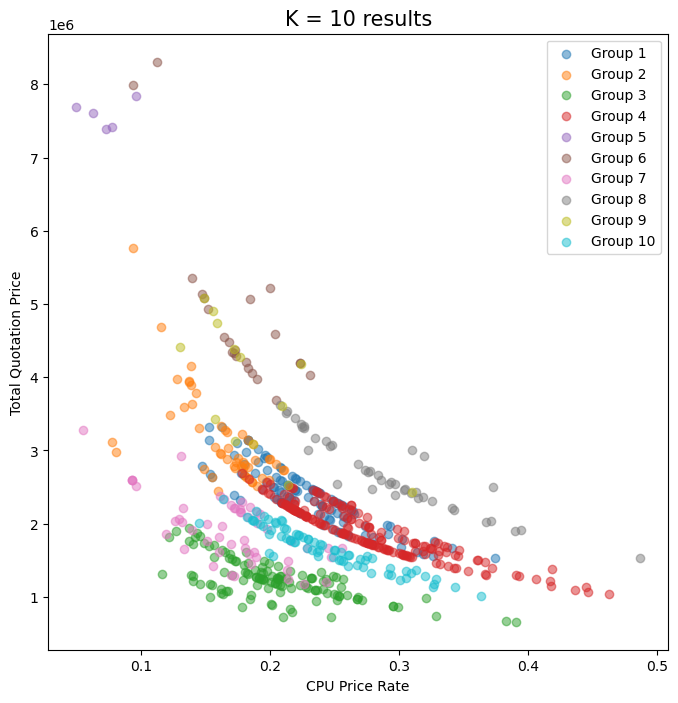

In [194]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 0], pdata[res == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [195]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 2369436
Group2 Average Total Price: 3123213
Group3 Average Total Price: 1233983
Group4 Average Total Price: 1906577
Group5 Average Total Price: 7591699
Group6 Average Total Price: 4805325
Group7 Average Total Price: 1931528
Group8 Average Total Price: 2694540
Group9 Average Total Price: 3859418
Group10 Average Total Price: 1666818


In [196]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 42544
Group2 Average Bench: 40572
Group3 Average Bench: 25685
Group4 Average Bench: 41849
Group5 Average Bench: 43963
Group6 Average Bench: 59687
Group7 Average Bench: 31491
Group8 Average Bench: 57573
Group9 Average Bench: 52374
Group10 Average Bench: 36470


In [197]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 528093
Group2 Average Price: 499422
Group3 Average Price: 244893
Group4 Average Price: 507606
Group5 Average Price: 546360
Group6 Average Price: 811623
Group7 Average Price: 316384
Group8 Average Price: 757680
Group9 Average Price: 692020
Group10 Average Price: 392327


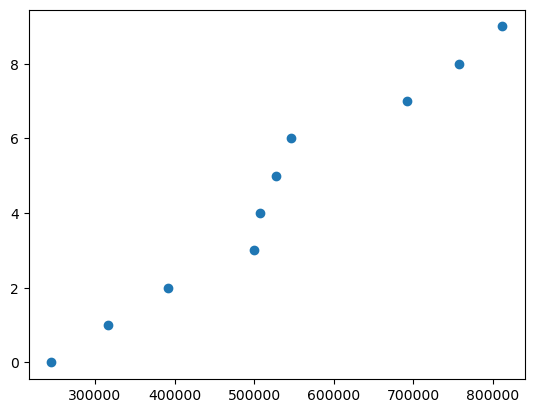

In [198]:
plt.scatter(np.sort(lst), range(len(lst)))
plt.show()

In [199]:
for i in range(k):
    cpu_rate = np.average(price_rate[res == i, 0]) * 100
    gpu_rate = np.average(price_rate[res == i, 1]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    print(f'Group{i+1} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%')

Group1 Average Rate: 23%: 46%: 7%: 75%
Group2 Average Rate: 16%: 57%: 2%: 75%
Group3 Average Rate: 21%: 48%: 4%: 73%
Group4 Average Rate: 28%: 44%: 3%: 74%
Group5 Average Rate:  7%: 83%: 2%: 92%
Group6 Average Rate: 17%: 55%: 2%: 75%
Group7 Average Rate: 17%: 51%: 7%: 75%
Group8 Average Rate: 29%: 43%: 3%: 75%
Group9 Average Rate: 19%: 46%: 8%: 73%
Group10 Average Rate: 24%: 47%: 3%: 74%


# 2. 총 견적 가격(y축)에서 GPU가 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 GPU의 가격이 차지하는 비율은 높아짐
- 그룹1 (파랑)

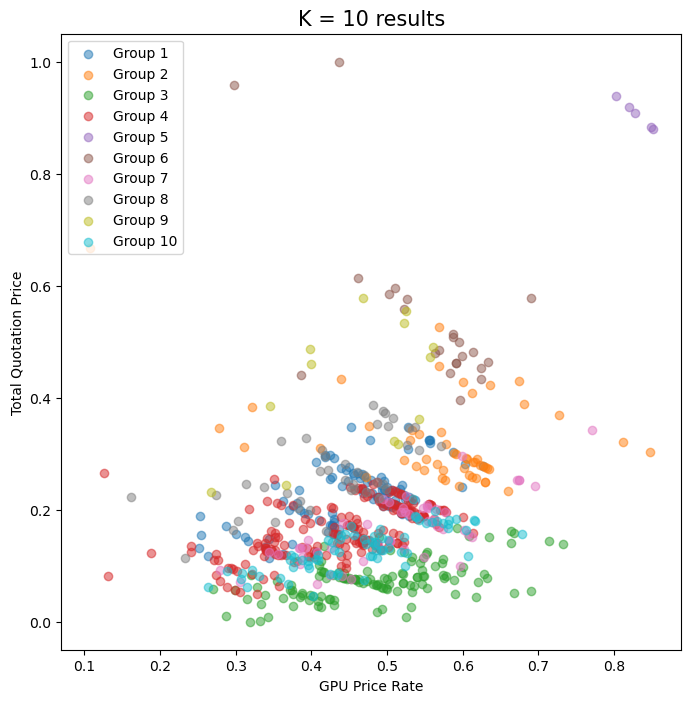

In [200]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 1], pdata[res == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 3. 총 견적 가격(y축)에서 RAM이 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 RAM의 가격이 차지하는 비율은 낮아짐
- 그룹1 (파랑)

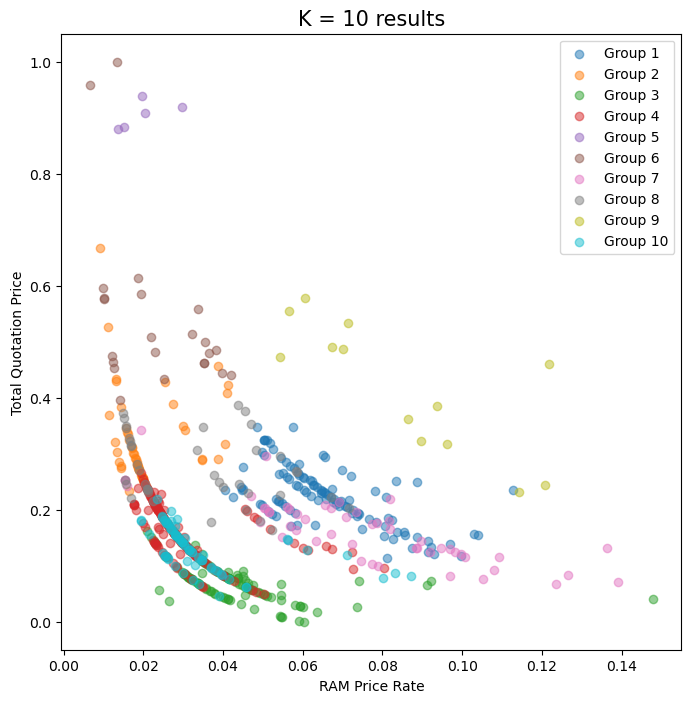

In [201]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 2], pdata[res == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('RAM Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 프로그램 사양 분석

In [202]:
gp = pd.read_csv('../gameprograms230921.csv')
ep = pd.read_csv('../etc_programs_utf.csv')
gr = pd.read_csv(f'../gamerequirements230926.csv')
er = pd.read_csv(f'../etc_requirements231002.csv')

In [203]:
programs = pd.concat([gp, ep], ignore_index=True)
reqs = pd.concat([gr, er], ignore_index=True)

In [204]:
headers = programs.usage.unique()
avg_cpu_bench = [0] * len(headers)
avg_gpu_bench = [0] * len(headers)
avg_ram_capa = [0] * len(headers)
total_counts = []

for usage in headers:
    programs_usage = reqs[reqs['program_id'].isin(programs.loc[programs.usage == usage].index)]
    
    cpu_bench = 0
    gpu_bench = 0
    ram_capa = 0
    total = len(programs_usage)
    
    for cid in programs_usage.cpu_id:
        cpu_bench += cpu_df.loc[cid-1, 'bench_mark']
    
    for gid in programs_usage.gpu_id:
        if np.isnan(gid): continue
        gpu_bench += gpu_df.loc[gid-1, 'bench_mark']
        
    for rc in programs_usage.ram:
        if np.isnan(rc): continue
        ram_capa += rc
        
    avg_cpu_bench[np.where(headers == usage)[0][0]] = cpu_bench / total
    avg_gpu_bench[np.where(headers == usage)[0][0]] = gpu_bench / total
    avg_ram_capa[np.where(headers == usage)[0][0]] = ram_capa / total
    total_counts.append(total)

print('  CPU |   GPU |  RAM |')
print('----------------------')
for h, acb, agb, arc, tt in zip(headers, avg_cpu_bench, avg_gpu_bench, avg_ram_capa, total_counts):
    print(f'{acb:5.0f} | {agb:5.0f} | {arc:4.1f} | {h} ({tt}개)')

  CPU |   GPU |  RAM |
----------------------
 3109 |  2968 |  5.4 | 게임 (12094개)
 5852 |  1332 |  3.8 | 사무 (6개)
 4874 |     0 |  5.8 | 개발 (16개)
 6118 |  1341 | 16.0 | 영상 편집 (12개)
25142 | 10948 | 13.6 | 방송 (5개)
 7903 |  5386 |  8.4 | 이미지 편집 (15개)
 6690 |  3139 | 12.6 | 모델링 (26개)
 6461 |  1448 |  7.4 | 인코딩 (8개)
 4316 |   200 |  7.5 | 음악 작업 (16개)


## 꾸

In [325]:
rdata = np.array(pd.DataFrame(prices_r))

In [326]:
rdata

array([[ 0.16052919,  0.34407198,  0.09197665, -4.13033761],
       [ 0.18593491,  0.58363361,  0.03960248, -3.204896  ],
       [ 0.2551446 ,  0.50038338,  0.02299391, -3.79146604],
       ...,
       [ 0.20783355,  0.47872455,  0.06175801, -3.64922806],
       [ 0.1996157 ,  0.51902332,  0.02162424, -3.73005151],
       [ 0.37154483,  0.30345874,  0.04926278, -3.89716888]])

In [327]:
k = 16
model_r = KMeans(n_clusters=k, n_init='auto')

In [328]:
model_r.fit(rdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=16, n_init='auto')

In [329]:
res_r = model_r.predict(rdata)

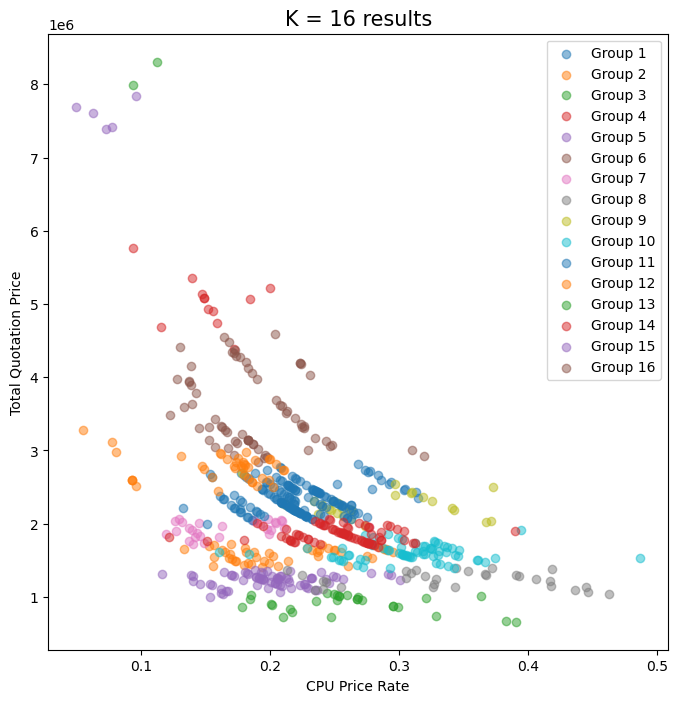

In [330]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 0], pdata[res_r == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [331]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_r == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 2523669
Group2 Average Total Price: 1579733
Group3 Average Total Price: 908703
Group4 Average Total Price: 5029554
Group5 Average Total Price: 1226498
Group6 Average Total Price: 3195250
Group7 Average Total Price: 1935399
Group8 Average Total Price: 1236852
Group9 Average Total Price: 2256087
Group10 Average Total Price: 1607199
Group11 Average Total Price: 2203866
Group12 Average Total Price: 2766664
Group13 Average Total Price: 8150370
Group14 Average Total Price: 1850401
Group15 Average Total Price: 7591699
Group16 Average Total Price: 4119316


In [332]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res_r == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_r == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 44370
Group2 Average Bench: 31187
Group3 Average Bench: 24290
Group4 Average Bench: 57069
Group5 Average Bench: 26285
Group6 Average Bench: 48496
Group7 Average Bench: 32553
Group8 Average Bench: 37501
Group9 Average Bench: 49405
Group10 Average Bench: 42337
Group11 Average Bench: 39917
Group12 Average Bench: 37916
Group13 Average Bench: 60847
Group14 Average Bench: 40862
Group15 Average Bench: 43963
Group16 Average Bench: 53695


In [333]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res_r == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_r == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 569212
Group2 Average Price: 336370
Group3 Average Price: 236064
Group4 Average Price: 757225
Group5 Average Price: 248503
Group6 Average Price: 629481
Group7 Average Price: 338759
Group8 Average Price: 420644
Group9 Average Price: 623612
Group10 Average Price: 492979
Group11 Average Price: 482896
Group12 Average Price: 448270
Group13 Average Price: 840430
Group14 Average Price: 470291
Group15 Average Price: 546360
Group16 Average Price: 709637


In [334]:
for i in range(k):
    cpu_rate = np.average(price_rate[res_r == i, 0]) * 100
    gpu_rate = np.average(price_rate[res_r == i, 1]) * 100
    ram_rate = np.average(price_rate[res_r == i, 2]) * 100
    print(f'Group{i+1:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%')

Group 1 Average Rate: 23%: 47%: 5%: 74%
Group 2 Average Rate: 21%: 50%: 4%: 75%
Group 3 Average Rate: 26%: 40%: 5%: 71%
Group 4 Average Rate: 15%: 48%: 3%: 67%
Group 5 Average Rate: 20%: 49%: 4%: 74%
Group 6 Average Rate: 20%: 48%: 4%: 72%
Group 7 Average Rate: 17%: 61%: 3%: 81%
Group 8 Average Rate: 34%: 31%: 5%: 70%
Group 9 Average Rate: 28%: 34%: 5%: 67%
Group10 Average Rate: 31%: 35%: 5%: 71%
Group11 Average Rate: 22%: 52%: 4%: 78%
Group12 Average Rate: 16%: 62%: 2%: 81%
Group13 Average Rate: 10%: 37%: 1%: 48%
Group14 Average Rate: 25%: 45%: 4%: 74%
Group15 Average Rate:  7%: 83%: 2%: 92%
Group16 Average Rate: 17%: 58%: 3%: 79%


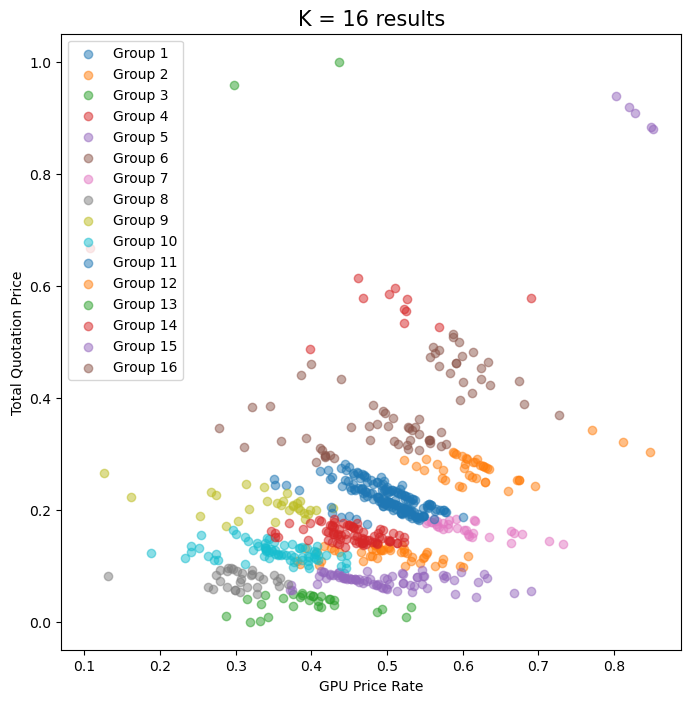

In [335]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 1], pdata[res_r == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

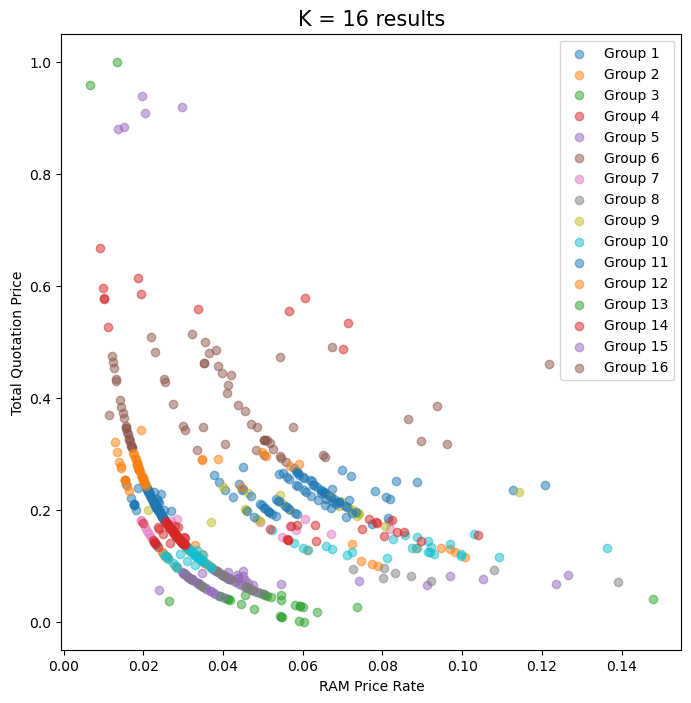

In [336]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 2], pdata[res_r == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('RAM Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 뚜

In [413]:
bdata = np.array(pd.DataFrame(bench_r))

In [414]:
bdata

array([[ 0.22815687,  0.45675156,  0.15321897, -4.13033761],
       [ 0.47393582,  0.69314718,  0.15321897, -3.204896  ],
       [ 0.30010535,  0.59457259,  0.0789389 , -3.79146604],
       ...,
       [ 0.3879034 ,  0.59457259,  0.15321897, -3.64922806],
       [ 0.34095617,  0.59457259,  0.0789389 , -3.73005151],
       [ 0.47393582,  0.42420983,  0.15321897, -3.89716888]])

In [415]:
k = 16
model_b = KMeans(n_clusters=k, n_init='auto')

In [416]:
model_b.fit(bdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=16, n_init='auto')

In [417]:
res_b = model_b.predict(bdata)

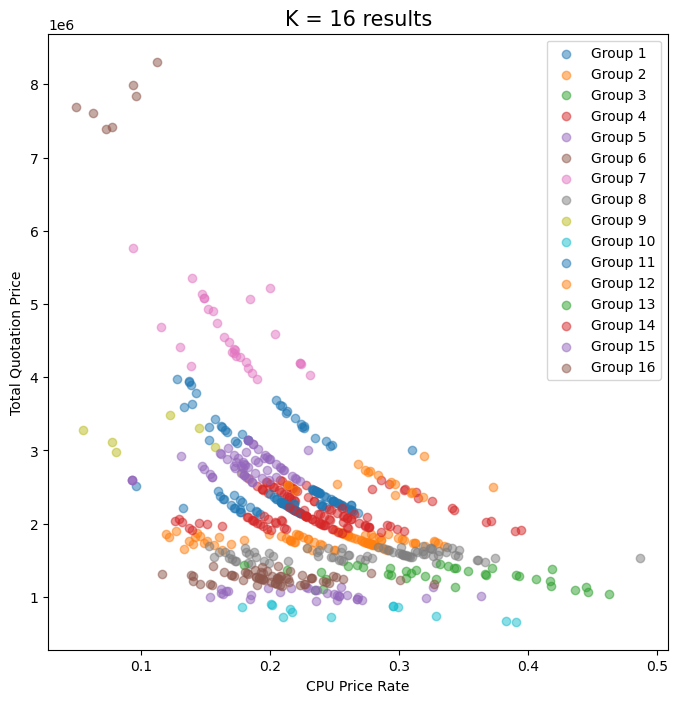

In [418]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_b == i, 0], pdata[res_b == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [390]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_b == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 4277350
Group2 Average Total Price: 1825812
Group3 Average Total Price: 2347156
Group4 Average Total Price: 1571039
Group5 Average Total Price: 2595790
Group6 Average Total Price: 934170
Group7 Average Total Price: 2699279
Group8 Average Total Price: 1068018
Group9 Average Total Price: 1914315
Group10 Average Total Price: 1855394
Group11 Average Total Price: 1279543
Group12 Average Total Price: 4094590
Group13 Average Total Price: 1449243
Group14 Average Total Price: 1436948
Group15 Average Total Price: 2697961
Group16 Average Total Price: 3941352


In [391]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res_b == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_b == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 57347
Group2 Average Bench: 40638
Group3 Average Bench: 36896
Group4 Average Bench: 28529
Group5 Average Bench: 48350
Group6 Average Bench: 26150
Group7 Average Bench: 36250
Group8 Average Bench: 25661
Group9 Average Bench: 47391
Group10 Average Bench: 40085
Group11 Average Bench: 24918
Group12 Average Bench: 51449
Group13 Average Bench: 27284
Group14 Average Bench: 41841
Group15 Average Bench: 50265
Group16 Average Bench: 57735


In [392]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res_b == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_b == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 755746
Group2 Average Price: 480790
Group3 Average Price: 456602
Group4 Average Price: 311482
Group5 Average Price: 556282
Group6 Average Price: 262758
Group7 Average Price: 470104
Group8 Average Price: 258731
Group9 Average Price: 540996
Group10 Average Price: 469740
Group11 Average Price: 241464
Group12 Average Price: 694724
Group13 Average Price: 262394
Group14 Average Price: 498028
Group15 Average Price: 610047
Group16 Average Price: 750970


In [430]:
crate = []
grate = []
rrate = []
for i in range(k):
    cpu_rate = np.average(price_rate[res_b == i, 0]) * 100
    gpu_rate = np.average(price_rate[res_b == i, 1]) * 100
    ram_rate = np.average(price_rate[res_b == i, 2]) * 100
    crate.append(cpu_rate)
    grate.append(gpu_rate)
    rrate.append(ram_rate)
    total_avg = np.average(np.array(prices['total'])[res_b == i])
    print(f'Group{i+1:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%: {total_avg:>7.0f}')

Group 1 Average Rate: 19%: 52%: 4%: 74%: 3404647
Group 2 Average Rate: 24%: 47%: 4%: 75%: 1770423
Group 3 Average Rate: 37%: 30%: 4%: 71%: 1143353
Group 4 Average Rate: 23%: 48%: 4%: 76%: 2438736
Group 5 Average Rate: 23%: 44%: 5%: 72%: 1043196
Group 6 Average Rate:  8%: 70%: 2%: 80%: 7751320
Group 7 Average Rate: 17%: 53%: 4%: 74%: 4570477
Group 8 Average Rate: 27%: 40%: 5%: 72%: 1578354
Group 9 Average Rate: 12%: 55%: 2%: 69%: 3127860
Group10 Average Rate: 27%: 41%: 6%: 73%:  800235
Group11 Average Rate: 22%: 51%: 4%: 77%: 2276523
Group12 Average Rate: 28%: 38%: 5%: 71%: 2578977
Group13 Average Rate: 32%: 36%: 5%: 72%: 1352170
Group14 Average Rate: 24%: 48%: 4%: 76%: 2032254
Group15 Average Rate: 18%: 54%: 4%: 76%: 2792307
Group16 Average Rate: 20%: 49%: 5%: 73%: 1258879


In [431]:
grouped = np.array([crate, grate, rrate]).T

In [434]:
grouped[5, 0]

8.076343930094854

# 모델 저장

In [420]:
import pickle

In [421]:
pickle.dump(model_b, open("rate_by_bench.pkl", "wb"))

In [433]:
pickle.dump(grouped, open("rate_group.pkl", "wb"))

In [422]:
load_model = pickle.load(open("rate_by_bench.pkl", "rb"))

In [426]:
load_group = pickle.load(open("rate_group.pkl", "rb"))

In [423]:
lres = load_model.predict(bdata)

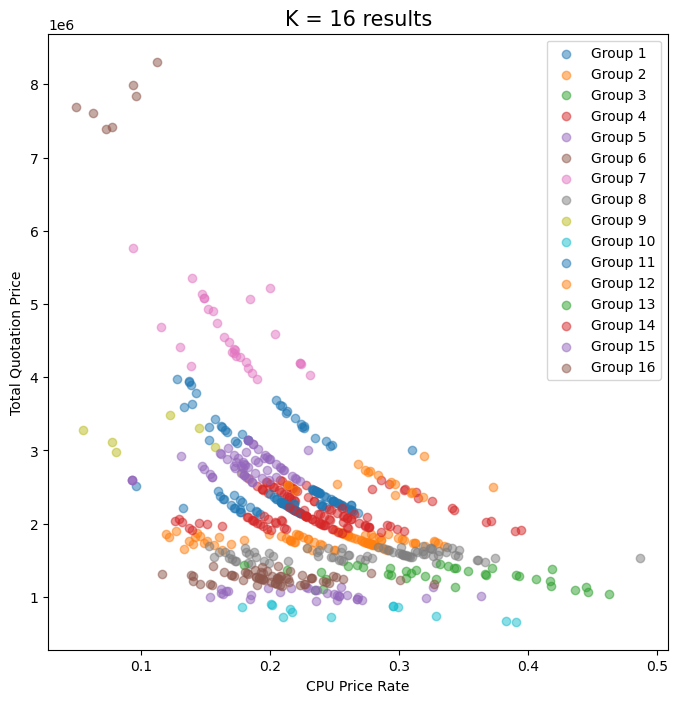

In [427]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(load_group[lres == i, 0], pdata[lres == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()